In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline



## Setting

![alt text](https://i.ytimg.com/vi/wDajm2VwQX4/maxresdefault.jpg)


In this exercise, we will work with a dataset about cars. In this dataset, we have information on 205 cars. These cars serve as a sample of all the cars we would like to study. Each car is associated with 26 attributes. The original data can be accessed from [here](https://archive.ics.uci.edu/ml/datasets/Automobile).  

According to the data source, a detailed description of the data and the description of the attributes are given as follows:

**Data Set Information**

This data set consists of three types of entities: 

> (a) the specification of an auto in terms of various characteristics

> (b) its assigned insurance risk rating

> (c) its normalized losses in use as compared to other cars. 

Type (b) corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

Type (c) gives the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.


**Attribute Information**

|No|Attribute|Attribute Range|
|---|---|---|
|1|symboling| -3, -2, -1, 0, 1, 2, 3|
|2| normalized-losses| continuous from 65 to 256|
|3|make|alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, <br> mercedes-benz, mercury,  mitsubishi, nissan, peugot, plymouth, porsche,  renault, <br> saab, subaru, toyota, volkswagen, volvo| 
|4|fuel-type| diesel, gas|
|5| aspiration| std, turbo|
|6| num-of-doors| four, two| 
|7| body-style| hardtop, wagon, sedan, hatchback, convertible|
|8| drive-wheels| 4wd, fwd, rwd|
|9| engine-location| front, rear|
|10| wheel-base| continuous from 86.6 120.9|
|11| length| continuous from 141.1 to 208.1|
|12| width| continuous from 60.3 to 72.3| 
|13| height| continuous from 47.8 to 59.8|
|14| curb-weight| continuous from 1488 to 4066|
|15| engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor| 
|16| num-of-cylinders| eight, five, four, six, three, twelve, two| 
|17| engine-size| continuous from 61 to 326|
|18| fuel-system| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|
|19| bore| continuous from 2.54 to 3.94|
|20| stroke| continuous from 2.07 to 4.17|
|21| compression-ratio| continuous from 7 to 23| 
|22| horsepower| continuous from 48 to 288| 
|23| peak-rpm| continuous from 4150 to 6600|
|24| city-mpg| continuous from 13 to 49|
|25| highway-mpg|continuous from 16 to 54|
|26| price|continuous from 5118 to 45400|



In [116]:
Auto=pd.read_csv("Auto.csv")
Auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## Q1. [6 points]

Based on the samples, we can identify the maker that produced cars with the lowest average risk and the maker that produced the cars with the highest average risk. Create a table that reports the names of those two makers and the value of average risk for each producer.

In [117]:
auto_df = Auto[["symboling","make"]]
avg_risk = auto_df.groupby(by="make").mean()
avg_risk.sort_values(by="symboling", ascending=True, inplace=True)
avg_risk.reset_index(inplace=True)
table = avg_risk.loc[[0, avg_risk.symboling.size-1],["make","symboling"]]
table.columns = [["maker", "average risk"]]
table

,maker,average risk
0,volvo,-1.272727
21,porsche,2.600000


## Q2. [12 points]

In some columns, we have "?" as the values for certain observations. For example, the price for the 10th model is "?". These question marks indicate missing values.

* Substitue all the "?" values in the "price" column with the average price computed using non-missing values in the price column. 
* Do the same thing for the "horsepower" column.
* For these two columns, report the average price and average horsepower after you finish the previous two steps.

[hint: in order to compute the average, you need to convert the column to float type. Thus, you have to convert ? to `np.nan`]

[hint: if [`Series.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html) method and [`np.nanmean()`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) can both calculate the average when you have missing values in a column]

In [118]:
Auto.price.replace('?',np.nan,inplace=True)
Auto.horsepower.replace('?',np.nan,inplace=True)
Auto = Auto.astype({"price":float,"horsepower":float})

Auto.iloc[np.where(Auto.price.isnull())[0], 25] = Auto.price.mean()
Auto.iloc[np.where(Auto.horsepower.isnull())[0], 21] = Auto.horsepower.mean()

avg_val = Auto[["price","horsepower"]]
avg_val.columns = ["average price", "average horsepower"]
avg_val = avg_val.mean()
avg_val

average price         13207.129353
average horsepower      104.256158
dtype: float64

## Q3. [6 points]

Add two columns to the table named "HighPrice" and "HighHorsepower".

The values in "High Price" column can be 0 or 1:

              1: If the price of the car is higher than the median price
              0: if the price of the car is lower than or equal to the median price


The values in "High Horsepower" column can be 0 or 1:

              1: If the horsepower of the car is higher than the median horsepower
              0. If the horsepower of the car is lower than or equal to the median horsepower

In [119]:
high_price = pd.DataFrame(Auto.price)
high_price_median = Auto.price.median()
high_price.iloc[np.where(Auto.price > high_price_median)] = 1
high_price.iloc[np.where(Auto.price <= high_price_median)] = 0

high_horsepower = pd.DataFrame(Auto.horsepower)
high_horsepower_median = Auto.horsepower.median()
high_horsepower.iloc[np.where(Auto.horsepower > high_horsepower_median)] = 1
high_horsepower.iloc[np.where(Auto.horsepower <= high_horsepower_median)] = 0
Auto = Auto.assign(HighPrice = high_price, HighHorsepower=high_horsepower)
Auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,HighPrice,HighHorsepower
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,13495.0,1.0,1.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000,21,27,16500.0,1.0,1.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000,19,26,16500.0,1.0,1.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102.0,5500,24,30,13950.0,1.0,1.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115.0,5500,18,22,17450.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400,23,28,16845.0,1.0,1.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300,19,25,19045.0,1.0,1.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500,18,23,21485.0,1.0,1.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.4,23.0,106.0,4800,26,27,22470.0,1.0,1.0


## Q4.  [8 points]

* What is the probability of a car having high horse power conditional on this car has high price? 

* Does the data suggest that having high horse power and high price are independent? 

In [120]:
#Event A: highhorsepower = 1, Event B: highprice = 1  P(A|B) = P(A and B)/P(B)
sample_space = 205 
Pr_B = np.sum(Auto.HighPrice)/sample_space
Filter = (Auto.HighPrice.values == 1) & (Auto.HighHorsepower.values == 1) 
table = Auto.loc[Filter, ["HighPrice","HighHorsepower"]]
Pr_AB = table.HighPrice.size/sample_space
Pr_event = Pr_AB/Pr_B
Pr_event

0.8137254901960785

In [121]:
Pr_A = np.sum(Auto.HighHorsepower)/sample_space
Pr_A == Pr_event

False

The data does not suggest having high horse power and a high price are independent because the probability of having a high horse power conditional on having a high car price is not equal to the probability of just having a high horse power. This condition of independence is not met therefore the events are dependent. 

## Q5.  [14 points]

We want to test whether the probability of a car having horsepower higher than 150 is **less than** 0.1.   

* Test the hypothesis based on repeated sampling using $\alpha=0.1$. Clearly show the following:

> 1.   Null hypothesis/Alternative hypothesis
> 2.   Visualize the distribution of the sample statistics from simulation, the rejection region(s), and the observed statistics in the same graph.
> 3.   Provide the conclusion.

* Interpret the type 1 and type 2 error in the context of this question.

**[Loop/List comprehension is allowed.]**

Event: car having a horsepower higher than 150

Null hypothesis: P(E) $\geq$ 0.1 

Alternative hypothesis: P(E) < 0.1

In [122]:
#actual probability from sample 
Filter = Auto.horsepower > 150 
event_space = Auto.loc[Filter, ["horsepower"]].size
pr = event_space/205
pr

0.15609756097560976

In [123]:
def sampling():
    samples = np.random.choice([0,1], size=205, p=[0.9,0.1])
    return np.mean(samples == 1)
samples = np.array([sampling() for i in range(1000)])

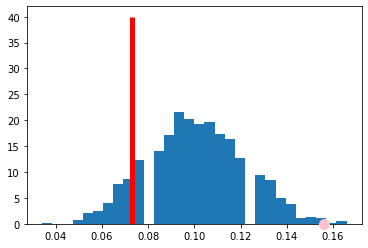

In [124]:
#rejection regions:if the actual value lies below the 10th percentile of the sample means, reject the 
#null hypothesis
plt.hist(samples,bins=30,density=True)
#alpha=.1
cutoffs=np.percentile(samples,10)
plt.vlines(cutoffs, 0, 40,color="red" ,lw=5)
plt.scatter(0.15609756097560976,0,c="pink",s=100,zorder=300,clip_on=False)
plt.show()

Conclustion: The actual probability p, 0.1561 does not lie below the 10th percentile of the sample means, so I fail to reject the null hypothesis, indicating that there is not enough evidence to support that the probability of having a horsepower of 150 is less than 0.1 for the entire population. 

In this case, a type 1 error would occur if I had found the opposite of my conclusion and recjected the null hypothesis. I would have determined that the that the probability of having a horsepower of 150 is likely less than 0.1 for the entire population, even though that is actually false. 

A type 2 error would occur if my current conlcusion is actually false, and the probability of having a horsepower of 150 is actually less than 0.1 for the entire population, but I failed to reject the null hypothesis and accept that conclusion. 

## Q6. [14 Points]

* Perform sample $n$ with replacement from this dataset, where $n$ is the number of observations we have in the dataset. Compute the **median** price from this new sample. Repeat this step 1000 times and plot the distribution of the 1000 sample medians you get. 

* Construct the $95\%$ confidence interval for  population median price. 

**[Loop/List comprehension is allowed.]**


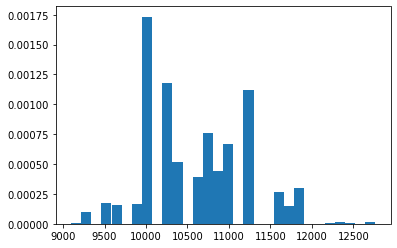

In [125]:
theta_hat= high_price_median
def sampling_from_sample():
  samples=np.random.choice(Auto.price,replace=True,size=205)
  return np.median(samples)
sample_medians=np.array([sampling_from_sample() for i in range(1000)])
plt.hist(sample_medians,bins=30,density=True)
plt.show()

In [126]:
CL=0.95
alpha=1-CL
lower_bound=2*theta_hat-np.percentile(sample_medians,(1-alpha/2)*100)
lower_bound

9340.0

In [127]:
upper_bound=2*theta_hat-np.percentile(sample_medians,(alpha/2)*100)
upper_bound

11641.0